In [13]:
import pandas as pd

pos_data = pd.read_csv('C:/Users/Ratsy/Downloads/New folder/Sentiment-Analysis-on-IMDB-Ratings/Dataset/Train/pos.csv', encoding='latin1')
neg_data = pd.read_csv('C:/Users/Ratsy/Downloads/New folder/Sentiment-Analysis-on-IMDB-Ratings/Dataset/Train/neg.csv', encoding='latin1')
unsup_data = pd.read_csv('C:/Users/Ratsy/Downloads/New folder/Sentiment-Analysis-on-IMDB-Ratings/Dataset/Train/unsup.csv', encoding='latin1')

print(pos_data.head())
print(neg_data.head())
print(unsup_data.head())



                                              Review
0  Bromwell High is a cartoon comedy. It ran at t...
1  Homelessness (or Houselessness as George Carli...
2  Brilliant over-acting by Lesley Ann Warren. Be...
3  This is easily the most underrated film inn th...
4  This is not the typical Mel Brooks film. It wa...
                                              Review
0  Story of a man who has unnatural feelings for ...
1  Airport '77 starts as a brand new luxury 747 p...
2  This film lacked something I couldn't put my f...
3  Sorry everyone,,, I know this is supposed to b...
4  When I was little my parents took me along to ...
                                              Review
0  I admit, the great majority of films released ...
1  Take a low budget, inexperienced actors doubli...
2  Everybody has seen 'Back To The Future,' right...
3  Doris Day was an icon of beauty in singing and...
4  After a series of silly, fun-loving movies, 19...


In [15]:
pos_data['label'] = 1
neg_data['label'] = 0

labeled_data = pd.concat([pos_data, neg_data], ignore_index=True)

print(labeled_data.head())
print(unsup_data.head())


                                              Review  label
0  Bromwell High is a cartoon comedy. It ran at t...      1
1  Homelessness (or Houselessness as George Carli...      1
2  Brilliant over-acting by Lesley Ann Warren. Be...      1
3  This is easily the most underrated film inn th...      1
4  This is not the typical Mel Brooks film. It wa...      1
                                              Review
0  I admit, the great majority of films released ...
1  Take a low budget, inexperienced actors doubli...
2  Everybody has seen 'Back To The Future,' right...
3  Doris Day was an icon of beauty in singing and...
4  After a series of silly, fun-loving movies, 19...


In [17]:
print(labeled_data['label'].value_counts())
print(labeled_data.info())
print(unsup_data.info())


label
1    12500
0    12500
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB
None


In [21]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

labeled_data['Review'] = labeled_data['Review'].apply(preprocess_text)
unsup_data['Review'] = unsup_data['Review'].apply(preprocess_text)

print(labeled_data.head())
print(unsup_data.head())


                                              Review  label
0  bromwell high cartoon comedy ran time program ...      1
1  homelessness houselessness george carlin state...      1
2  brilliant acting lesley ann warren best dramat...      1
3  easily underrated film inn brook cannon sure f...      1
4  typical mel brook film much less slapstick mov...      1
                                              Review
0  admit great majority film released say dozen m...
1  take low budget inexperienced actor doubling p...
2  everybody seen back future right whether like ...
3  doris day icon beauty singing acting warm voic...
4  series silly fun loving movie big year doris d...


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X_train = vectorizer.fit_transform(labeled_data['Review'])

X_unsup = vectorizer.transform(unsup_data['Review'])


In [27]:

y_train = labeled_data['label']


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print(f"Classification Report:\n{classification_report(y_val, y_pred)}")


Accuracy: 0.8848
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2485
           1       0.88      0.89      0.89      2515

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



Accuracy: 0.883
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2485
           1       0.88      0.89      0.88      2515

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



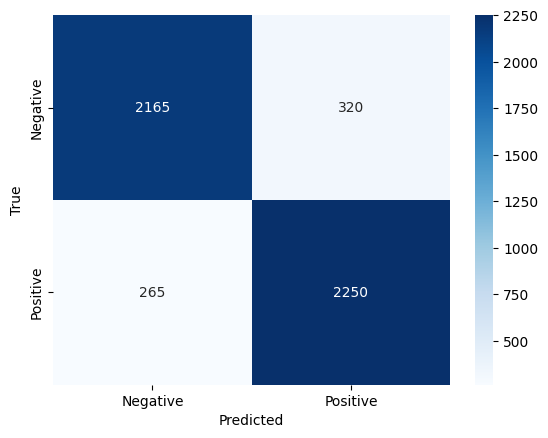

In [35]:
import scipy
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_unsup_pred = model.predict(X_unsup)

X_combined = scipy.sparse.vstack([X_train, X_unsup])
y_combined = np.concatenate([y_train, y_unsup_pred])

model.fit(X_combined, y_combined)

y_pred = model.predict(X_val)
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print(f"Classification Report:\n{classification_report(y_val, y_pred)}")

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy: 0.8767298616110711
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12501
           1       0.87      0.88      0.88     12501

    accuracy                           0.88     25002
   macro avg       0.88      0.88      0.88     25002
weighted avg       0.88      0.88      0.88     25002



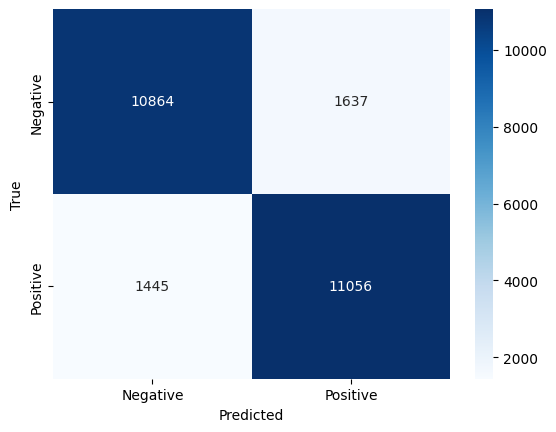

In [39]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the positive and negative test data files
pos_data = pd.read_csv('C:/Users/Ratsy/Downloads/New folder/Sentiment-Analysis-on-IMDB-Ratings/Dataset/Test/pos.csv', encoding='latin1', header=None, names=['Review'])
neg_data = pd.read_csv('C:/Users/Ratsy/Downloads/New folder/Sentiment-Analysis-on-IMDB-Ratings/Dataset/Test/neg.csv', encoding='latin1', header=None, names=['Review'])

# Add labels (1 for positive, 0 for negative)
pos_data['Sentiment'] = 1
neg_data['Sentiment'] = 0

# Combine the positive and negative data
test_df = pd.concat([pos_data, neg_data])

# Preprocess the test data using the same preprocessing function
test_df['Review'] = test_df['Review'].apply(preprocess_text)

# Transform the test data using the trained vectorizer
X_test = vectorizer.transform(test_df['Review'])

# Get the true labels
y_test = test_df['Sentiment']

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [41]:
import joblib

# Save the model and vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']